Hello!

My name is Carlos Ortiz. I'm happy to review your project today.

When I see an error the first time, I'll just point it out. I'll let you find it and fix it yourself. Also throughout the text I will make some observations about improvement in the code and also make comments about your perceptions on the subject. But if you still can't handle this task, I will give you a more precise hint in the next iteration and also some praticals examples. I will be open to feedbacks and discussions on the topic.

You will find my comments below - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

# Determining the More Profitable Cell Phone Plan

# Contents <a id='back'></a>
* [1. Introduction](#intro)
* [2. Data Exploration](#data_exploration)
    * [Conclusion](#data_exploration_conclusion)
* [3. Data Cleaning and Data Enrichment](#data_cleaning)
    * [Plan Data](#plan)
    * [User Data](#user)
    * [Call Data](#call)
    * [Message Data](#message)
    * [Internet Data](#internet)
    * [Anomalies](#anomalies)
* [4. Data Aggregation](#data_aggregation)
    * [Monthly Data Per User](#monthly_data_per_user)
    * [Merging Monthly Data Per User](#merging_monthly_data)
    * [Plan and User Statistics](#plan_and_user_statistics)
* [5. Study User Behaviour](#study_user_behaviour)
    * [Number of Calls](#number_of_calls)
    * [Call Duration](#call_duration)
    * [Number of Messages](#number_of_messages)
    * [Volume of Internet Traffic](#volume_of_internet_traffic)
    * [Revenue](#revenue)
    * [Conclusion](#user_behaviour_conclusion)
* [6. Hypothesis Testing](#hypothesis_testing)
    * [Hypothesis 1](#hypothesis_1)
    * [Hypothesis 2](#hypothesis_2)
* [7. General Conclusion](#general_conclusion)

## 1. Introduction <a id='intro'></a>
This project is to perform an analysis for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 500 randomly selected costumers data in 2018 are provided by the company.

### Purpose
This project aims to answer the following quesions:
1. Between the two plans, surf and ultimate, which of them generates more revenue for the Megaline company?
2. Do the users from different areas/regions generate different amount of revenue?

### Hypothesis
To answer the questions above, the following hypotheses are formulated:
1. The average revenue from users of the Ultimate and Surf calling plans differs.
2. The average revenue from users in the NY-NJ area is different from that of the users in the other regions.

[Back to Contents](#back)

## 2. Data Exploration <a id='data_exploration'></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# Load datasets
try:
    plan_data = pd.read_csv('megaline_plans.csv')
    user_data = pd.read_csv('megaline_users.csv')
    call_data = pd.read_csv('megaline_calls.csv')
    message_data = pd.read_csv('megaline_messages.csv')
    internet_data = pd.read_csv('megaline_internet.csv')
except:
    plan_data = pd.read_csv('/datasets/megaline_plans.csv')
    user_data = pd.read_csv('/datasets/megaline_users.csv')
    call_data = pd.read_csv('/datasets/megaline_calls.csv')
    message_data = pd.read_csv('/datasets/megaline_messages.csv')
    internet_data = pd.read_csv('/datasets/megaline_internet.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job reading the data and importing the libraries!
</div>

There are quite a number of datasets in this project. In this stage, we will first explore them individually and find all the obvious issues. These issues will be treated in the data cleaning stage.

**`plan_data`**

In [3]:
# Hava a look at the plan_data
plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The `plan_data` has 2 rows (the `surf` and `ultimate` plans) and 8 columns information related to each plan.

According to the documentation:

**Description of data**
- plan_name - calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


In [4]:
# Get the general information
plan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


No missing value in the `plan_data`. All the data types are also correct.

**Issues and solutions**
- As stated in the documentation, the renenue from internet is calculated in the unit of `gb`, thus the values in `mb_per_month_included` should be divided by 1024 and the column name has to be renamed.

**`user_data`** <a id='user'></a>

In [5]:
# Hava a look at the user_data
user_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


There are 500 rows (selected customers) and 8 columns of information related to each customer.

According to the documentation:

**Description of data**
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- city — user's city of residence
- plan — calling plan name

In [6]:
# Check if there is any missing value
user_data.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [7]:
# Get the general information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


There are 466 missing values in `churn_date` column. These missing values indicate that these users were using the calling plans when the data was extracted from the database. Therefore, we will keep these missing values.

**Issues and solutions**
- The data types of `reg_date` and `churn_date` are incorrect and will be changed to `datetime`.

In [8]:
# Look at the statictics of the numerical columns
user_data.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In the `age` column, the minimum value is 16 and the maximum value is 75, no obvious outlier is detected.

[Back to Contents](#back)

**`call_data`**

In [9]:
# Hava a look at the call_data
call_data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


There are 137735 rows (calls) and 4 columns of information related to each call.

According to the documentation:

**Description of data**
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call

In [10]:
# Check if there is any missing value
call_data.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [11]:
# Get the general information
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


No missing value in the `call_data`.

**Issues and solutions**
- The data types of `call_date` will be changed to `datetime`.
- According to the Megaline company, the `duration` is rounded up to the integral value in minute and charge the overage fee accordingly. Thus, after the monthly call duration is calculated, the values of `duration` will be rounded up and the data type will be changed to `int64`.

In [12]:
# Look at the statictics of the numerical columns
call_data.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**Issues**
- In the `duration` column, the minimum value is 0 and the maximum value is 37.6. A minimum value of `0` second is unreasonable and most likely represents a 'missed call'.

**`message_data`**

In [13]:
# Hava a look at the message_data
message_data

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


There are 76051 rows (messages) and 3 columns of information related to each message.

According to the documentation:

**Description of data**
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text

In [14]:
# Get the general information
message_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No missing value in the `message_data`.

**Issues and solutions**
- The data types of `message_date` will be changed to `datetime`.

**`internet_data`**

In [15]:
# Hava a look at the internet_data
internet_data

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


There are 104825 rows (internet sessions) and 4 columns of information related to each internet session.

According to the documentation:

**Description of data**
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier

In [16]:
# Get the general information
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


**Issues detected and solutions**
- The data type of `session_date` will be changed to `datetime`.
- The `mb_used` is rounded up to the integral value in `gb` and calculate the monthly overage fee. Therefore, after calculate the monthly internet volume traffic, the values of `mb_used` will be divided by 1024 and rounded up, the data type will be changed to `int64`.

In [17]:
# Look at the statictics of the numerical columns
internet_data.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


**Issues**
- As mentioned by the Megaline, the values in the `mb_used` column should be in the unit of `gb`. Besides there, the minimum value of `0` is also questionable and will be investigated later.

### Conclusion <a id='data_exploration_conclusion'></a>
The five datasets provided by the Megaline company are sufficient to conduct the relevant analysis and test the hypotheses. However, there are

**Issues need to be addresed later**
- The data types of `reg_date`, `churn_date`, `call_date`, `message_date`, `session_date` will be changed to `datetime`.
- The `mb_per_month_included` will be renamed to `gb_per_month_included`.
- The values of `duration` will be rounded to the integral value and summed up for each month, data type will be changed to `int64`. 
- The values of `mb_used` will be summed up for each month, divided by 1024 and rounded to the integral value, data type will be changed to `int64`.
- The `0` values in `duration` and `mb_used` will be investigated further and dropped if they are anomalies.

[Back to Contents](#back)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nicely done in this section! Now we know the issues our data have and what we need to do with them.
</div>

## 3. Data Cleaning and Data Enrichment <a id='data_cleaning'></a>

In this stage, we will solve the issues as stated above. Besides that, some columns will be added to facilitate the analysis process later.

### Plan Data <a id='plan'><a/>

In [18]:
# Look at the plan data
plan_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
# Divide mb_per_month_included by 1024, round up the result and change to int64 datatype
plan_data['mb_per_month_included'] = np.ceil(plan_data['mb_per_month_included'] / 1024).astype('int64')

# Rename the column name as gb_per_month_included
plan_data.rename(columns = {'mb_per_month_included': 'gb_per_month_included'}, inplace = True)

In [20]:
# Check the general information
plan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [21]:
# Check the plan_data again
plan_data

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfect!
</div>

[Back to Contents](#back)

### User Data <a id='user'></a>

In [22]:
# look at a sample of the user_data
user_data.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
325,1325,Cleora,Lyons,43,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-26,surf,NaN


In [23]:
# Check for duplicates
user_data.duplicated().sum()

0

No duplicate was found. Now let's change the data types of `churn_data` and `reg_date`

In [24]:
# Set a variable to store the date format for later changes
date_format = '%Y-%m-%d'

# Change the data types of churn_date and reg_date to datetime
user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], format = date_format)
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'], format = date_format)

# Check if the changes are applied
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In this project, we will test if the revenue from users in the `NY-NJ` area is different from that of the users in the other regions. A `region` column will be created to find the user in `New York-Newark-Jersey City`.

In [25]:
user_data['region'] = user_data['city'].apply(
    lambda x: 'NY-NJ' if 'New York-Newark-Jersey City' in x else 'others')

In [26]:
user_data[['city','region']]

,city,region
0,"Atlanta-Sandy Springs-Roswell, GA MSA",others
1,"Seattle-Tacoma-Bellevue, WA MSA",others
2,"Las Vegas-Henderson-Paradise, NV MSA",others
3,"Tulsa, OK MSA",others
4,"Seattle-Tacoma-Bellevue, WA MSA",others
...,...,...
495,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
496,"New Orleans-Metairie, LA MSA",others
497,"Los Angeles-Long Beach-Anaheim, CA MSA",others
498,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ


The values in `region` were created as expected.

On the other hand, this project will also have a test on the **monthly revenue values in 2018**, thus all the `datetime` data will be used to recreate two columns containing the `year` and `month` values in order to facilitate the analysis process later.

In [27]:
# Create a function to add datetime values
def create_datetime_values(data, name_date):
    """
    This function creates four datetime values of year and month    
    The new values will be stored in two additional columns
    """
        
    # reg_date, churn_date, call_date, message_date, internet_date have the same format
    # store the 'name' string in data['name_date']
    
    name = name_date.split('_')[0]
    
    # Create four new columns in the data with values of year, month    
    data[f'{name}_year'] = data[f'{name}_date'].dt.year
    data[f'{name}_month'] = data[f'{name}_date'].dt.month    

In [28]:
# Add datetime values for reg_date
create_datetime_values(user_data, 'reg_date')

# Check the additional columns
user_data[
    ['reg_date', 'reg_year', 'reg_month']
].head()

,reg_date,reg_year,reg_month
0,2018-12-24,2018,12
1,2018-08-13,2018,8
2,2018-10-21,2018,10
3,2018-01-28,2018,1
4,2018-05-23,2018,5


In [29]:
# Add datetime values for churn_date
create_datetime_values(user_data, 'churn_date')

# Check the additional columns
user_data.query('churn_date.notna()')[
    ['churn_date', 'churn_year', 'churn_month']
].head()

,churn_date,churn_year,churn_month
6,2018-12-18,2018.0,12.0
12,2018-11-16,2018.0,11.0
22,2018-09-07,2018.0,9.0
40,2018-12-30,2018.0,12.0
50,2018-10-07,2018.0,10.0


All the addtional `datetime` values were succeffully created.

In [30]:
# Check the general information
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     datetime64[ns]
 8   region       500 non-null    object        
 9   reg_year     500 non-null    int32         
 10  reg_month    500 non-null    int32         
 11  churn_year   34 non-null     float64       
 12  churn_month  34 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int32(2), int64(2), object(5)
memory usage: 47.0+ KB


In [31]:
# Final check on some rows of user_data
user_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,reg_year,reg_month,churn_year,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,others,2018,12,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,8,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,others,2018,10,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,others,2018,1,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,others,2018,5,NaN,NaN


Done, let's move to the `call_data`.

[Back to Contents](#back)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great!
</div>

### Call Data <a id='call'></a>

In [32]:
# look at a sample of the call_data
call_data.sample()

,id,user_id,call_date,duration
1776,1009_198,1009,2018-08-19,8.25


In [33]:
# Check for duplicates
call_data.duplicated().sum()

0

No duplicates, let's change the data type of `call_date`.

In [34]:
# Change the data types of call_date to datetime
call_data['call_date'] = pd.to_datetime(call_data['call_date'], format = date_format)

# Check if the change is applied
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Next, we will add the `datetime` values for `call_date` and round up `duration`.

In [35]:
# Add datetime values for call_date
create_datetime_values(call_data, 'call_date')

# Check the additional columns
call_data[
    ['call_date', 'call_year', 'call_month']
].head()

,call_date,call_year,call_month
0,2018-12-27,2018,12
1,2018-12-27,2018,12
2,2018-12-27,2018,12
3,2018-12-28,2018,12
4,2018-12-30,2018,12


In `call_data`, there are some abnormal values of `0` in `duration`, theses values most likely are 'missed calls'. Let's check how much is the percentage of these anomalies.

In [36]:
# Check the percentage of records have value of 0 in duration
print('Percentage of 0 second calls in call_data: ' +
     f'{call_data.query("duration == 0").shape[0] / call_data.shape[0]:.2%}')

Percentage of 0 second calls in call_data: 19.48%


A percentage of 19.48% is quite a lot. However, dropping these 0 second records will not affect the revenue calculation. In addition, removal of these anomalies will increase the accuracy of some statistics, for example the average duration per call.

In [37]:
# Remove the call_data with values of 0 in duration
call_data = call_data.query('duration != 0')

In [38]:
# Check the general information
call_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  float64       
 4   call_year   110901 non-null  int32         
 5   call_month  110901 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 5.1+ MB


In [39]:
# Final check on some rows of call_data
call_data.head()

,id,user_id,call_date,duration,call_year,call_month
0,1000_93,1000,2018-12-27,8.52,2018,12
1,1000_145,1000,2018-12-27,13.66,2018,12
2,1000_247,1000,2018-12-27,14.48,2018,12
3,1000_309,1000,2018-12-28,5.76,2018,12
4,1000_380,1000,2018-12-30,4.22,2018,12


Everything works as expected.

[Back to Contents](#back)

### Message Data <a id='message'></a>

In [40]:
# look at a sample of the message_data
message_data.sample()

,id,user_id,message_date
11924,1079_323,1079,2018-11-14


In [41]:
# Check for duplicates
call_data.duplicated().sum()

0

No obvious duplicate.

In [42]:
# Change the data types of message_date to datetime
message_data['message_date'] = pd.to_datetime(message_data['message_date'], format = date_format)

# Check if the change is applied
message_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [43]:
# Add datetime values for message_date
create_datetime_values(message_data, 'message_date')

# Check the additional columns
message_data[
    ['message_date', 'message_year', 'message_month']
].head()

,message_date,message_year,message_month
0,2018-12-27,2018,12
1,2018-12-31,2018,12
2,2018-12-31,2018,12
3,2018-12-27,2018,12
4,2018-12-26,2018,12


In [44]:
# Check the general information
message_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_year   76051 non-null  int32         
 4   message_month  76051 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 2.3+ MB


In [45]:
# Final check on some rows of call_data
message_data.head()

,id,user_id,message_date,message_year,message_month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12


Good. Let's proceed to the last dataset.

[Back to Contents](#back)

### Internet Data <a id='internet'></a>

In [46]:
# look at a sample of the internet_data
internet_data.sample()

,id,user_id,session_date,mb_used
44492,1196_507,1196,2018-08-09,446.77


In [47]:
# Check for duplicates
internet_data.duplicated().sum()

0

In [48]:
# Change the data types of session_date to datetime
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = date_format)

# Check if the change is applied
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [49]:
# Add datetime values for session_date
create_datetime_values(internet_data, 'session_date')

# Check the additional columns
internet_data[
    ['session_date', 'session_year', 'session_month']
].head()

,session_date,session_year,session_month
0,2018-12-29,2018,12
1,2018-12-31,2018,12
2,2018-12-28,2018,12
3,2018-12-26,2018,12
4,2018-12-27,2018,12


The `mb_used` column has `0` values which are possibly due to 'missed clicks'. As what was done to the `duration` column, these anomalies will be dropped. Let's check the precentage of these values.

In [50]:
# Check the percentage of records have value of 0 in gb_used
print('Percentage of 0 gb_used internet session in internet_data: ' +
     f'{internet_data.query("mb_used == 0").shape[0] / internet_data.shape[0]:.2%}')

Percentage of 0 gb_used internet session in internet_data: 13.11%


A percentage of 13.11%. We will proceed to drop these values to increase the accuracy of some other statistics like average volume of internet traffic per session.

In [51]:
# Drop the 0 values in gb_used
internet_data = internet_data.query('mb_used != 0')

In [52]:
# Check the general information
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             91078 non-null  object        
 1   user_id        91078 non-null  int64         
 2   session_date   91078 non-null  datetime64[ns]
 3   mb_used        91078 non-null  float64       
 4   session_year   91078 non-null  int32         
 5   session_month  91078 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 4.2+ MB


In [53]:
# Final check on some rows of message_data
internet_data.head()

,id,user_id,session_date,mb_used,session_year,session_month
0,1000_13,1000,2018-12-29,89.86,2018,12
2,1000_379,1000,2018-12-28,660.40,2018,12
3,1000_413,1000,2018-12-26,270.99,2018,12
4,1000_442,1000,2018-12-27,880.22,2018,12
5,1001_0,1001,2018-08-24,284.68,2018,8


All the data types are correct, the datetime values were added, the anomalies in `mb_used` were drop. Everything looks good.

[Back to Contents](#back)

**Anomalies** <a id='anomalies'></a>

Before ending the data cleaning stage, we will check if there is any other abnomaly in the data. All the datasets except the `plan_data` have `datetime` variables, anomalies relating to these variables may occur. For example, a user has a `churn_date` earlier than the `reg_date`. 

Therefore, the following investigations will be carried out:
1. Check if all the data are in the year of 2018 as stated by the Megaline company.
2. For those terminated the call plans, check if all the `reg_date` is earlier than that of the `churn_date`.
3. Check if all the dates in `call_data`, `message_data`, `internet_data` lie between the `reg_date` and the `churn_date`.

First, let's check if all data are in the year of 2018, as mentioned by the Megaline company.

In [54]:
# Check the unique value in reg_year
user_data['reg_year'].unique()

array([2018])

In [55]:
# Check the unique value in call_year
call_data['call_year'].unique()

array([2018])

In [56]:
# Check the unique value in message_year
call_data['call_year'].unique()

array([2018])

In [57]:
# Check the unique value in internet_year
call_data['call_year'].unique()

array([2018])

Perfect. All the extracted data are indeed in the year of 2018. 

Next, we will check if all the `reg_date` is earlier than that of the `churn_date`.

In [58]:
# Find the number of users who terminated the call plans in 2018
print(
    'The number of terminated users in 2018: ' + 
    f'{user_data.query("churn_date.notna()").shape[0]}'
)

# Find the number of terminated users with churn_date >= reg_date
print(
    'The number of terminated users with reg_date earlier than churn_date: ' +
    f'{(user_data.query("churn_date.notna() and (reg_date <= churn_date)")).shape[0]}'
)

# Find the number of users with churn_date < reg_date
print(
    'The number of users terminated users with reg_date later than churn_date: ' +
    f'{(user_data.query("churn_date.notna() and (reg_date > churn_date)")).shape[0]}'
)

The number of terminated users in 2018: 34
The number of terminated users with reg_date earlier than churn_date: 34
The number of users terminated users with reg_date later than churn_date: 0


No issue was found.

Finally, let's check if all the dates in `call_data`, `message_data`, `internet_data` lie between the `reg_date` and the `churn_date`. If there is any data does not meet the conditions, it will be deemed as 'invalid data' and dropped from the data.

In [59]:
# Merge call_data with the reg_date and churn_date values from user_data
call_data = call_data.merge(
    user_data[['user_id', 'reg_date', 'churn_date']],
    on = 'user_id',
    how = 'left'
)

In [60]:
# Merge message_data with the reg_date and churn_date values from user_data
message_data = message_data.merge(
    user_data[['user_id', 'reg_date', 'churn_date']],
    on = 'user_id',
    how = 'left'
)

In [61]:
# Merge internet_data with the reg_date and churn_date values from user_data
internet_data = internet_data.merge(
    user_data[['user_id', 'reg_date', 'churn_date']],
    on = 'user_id',
    how = 'left'
)

In [62]:
# Check if the merge is applied
display(call_data.head(3))
display(message_data.head(3))
display(internet_data.head(3))

,id,user_id,call_date,duration,call_year,call_month,reg_date,churn_date
0,1000_93,1000,2018-12-27,8.52,2018,12,2018-12-24,NaT
1,1000_145,1000,2018-12-27,13.66,2018,12,2018-12-24,NaT
2,1000_247,1000,2018-12-27,14.48,2018,12,2018-12-24,NaT


,id,user_id,message_date,message_year,message_month,reg_date,churn_date
0,1000_125,1000,2018-12-27,2018,12,2018-12-24,NaT
1,1000_160,1000,2018-12-31,2018,12,2018-12-24,NaT
2,1000_223,1000,2018-12-31,2018,12,2018-12-24,NaT


,id,user_id,session_date,mb_used,session_year,session_month,reg_date,churn_date
0,1000_13,1000,2018-12-29,89.86,2018,12,2018-12-24,NaT
1,1000_379,1000,2018-12-28,660.40,2018,12,2018-12-24,NaT
2,1000_413,1000,2018-12-26,270.99,2018,12,2018-12-24,NaT


In [63]:
# Let's check if there is any invalid data in call_data
call_data.query('(churn_date.notna() == True) and ((call_date < reg_date) or (call_date > churn_date))')

,id,user_id,call_date,duration,call_year,call_month,reg_date,churn_date
789,1006_50,1006,2018-12-21,12.30,2018,12,2018-11-27,2018-12-18
792,1006_74,1006,2018-12-26,9.12,2018,12,2018-11-27,2018-12-18
2873,1012_2,1012,2018-12-23,2.53,2018,12,2018-06-28,2018-11-16
2874,1012_5,1012,2018-11-17,9.49,2018,11,2018-06-28,2018-11-16
2875,1012_6,1012,2018-12-24,9.47,2018,12,2018-06-28,2018-11-16
...,...,...,...,...,...,...,...,...
109221,1491_639,1491,2018-11-26,4.87,2018,11,2018-04-27,2018-09-18
109223,1491_641,1491,2018-12-14,10.39,2018,12,2018-04-27,2018-09-18
109224,1491_642,1491,2018-10-08,6.91,2018,10,2018-04-27,2018-09-18
109225,1491_644,1491,2018-11-29,11.17,2018,11,2018-04-27,2018-09-18


There are 2390 invalid data in `call_data`. For example, it is impossible for `user_id` 1006 made two calls after the `churn_date`. We will calculate what are the percentages of these invalid data in `call_data`, `message_data` and `internet_data`.

In [64]:
# Create the valid conditions for later use
active_user = 'churn_date.isna()'
terminated_user = 'churn_date.notna()'

active_call_valid = active_user + ' and (call_date >= reg_date)'
terminated_call_valid = terminated_user + ' and (reg_date <= call_date <= churn_date)'

active_message_valid = active_user + ' and (message_date >= reg_date)'
terminated_message_valid = terminated_user + ' and (reg_date <= message_date <= churn_date)'

active_internet_valid = active_user + ' and (session_date >= reg_date)'
terminated_internet_valid = terminated_user + ' and (reg_date <= session_date <= churn_date)'

In [65]:
# Define a dictionary to automate the later checking process
service_dict = {
    'call': call_data,
    'message': message_data,
    'internet': internet_data
}

valid_condition_dict = {
    'call': active_call_valid + ' or ' + terminated_call_valid,
    'message': active_message_valid + ' or ' + terminated_message_valid,
    'internet': active_internet_valid + ' or ' + terminated_internet_valid,
}

In [66]:
# Check the number of valid and invalid data
for service, service_data in service_dict.items():    
    total_count = service_data.shape[0]
    valid_count = service_data.query(
        valid_condition_dict[service]
    ).shape[0]
    invalid_count = total_count - valid_count
    invalid_percentage = invalid_count / service_data.shape[0]
    
    print(f'{service}_data')
    print(f'Number of rows: {total_count}')
    print(f'Number of valid data: {valid_count}')
    print(f'Number of invalid data: {invalid_count}')
    print(f'Percentage of invalid data: {invalid_percentage:.2%}')
    print()
    print('-' * 40)

call_data
Number of rows: 110901
Number of valid data: 108511
Number of invalid data: 2390
Percentage of invalid data: 2.16%

----------------------------------------
message_data
Number of rows: 76051
Number of valid data: 74460
Number of invalid data: 1591
Percentage of invalid data: 2.09%

----------------------------------------
internet_data
Number of rows: 91078
Number of valid data: 88980
Number of invalid data: 2098
Percentage of invalid data: 2.30%

----------------------------------------


Only a small amount of invalid data. Let's remove them.

In [67]:
# Drop invalid data in call_data
call_data = call_data.query(
    valid_condition_dict['call']
).reset_index(drop = True)

In [68]:
# Check if the remaining number of rows = 108511
call_data.shape[0]

108511

In [69]:
# Drop invalid data in message_data
message_data = message_data.query(
    valid_condition_dict['message']
).reset_index(drop = True)

In [70]:
# Check if the remaining number of rows = 74460
message_data.shape[0]

74460

In [71]:
# Drop invalid data in internet_data
internet_data = internet_data.query(
    valid_condition_dict['internet']
).reset_index(drop = True)

In [72]:
# Check if the remaining number of rows = 88980
internet_data.shape[0]

88980

[Back to Contents](#back)

## 4. Data Aggregation <a id='data_aggregation'></a>

### Monthly Data Per User <a id='monthly_data_per_user'></a>
The next step is to aggregate data and calculate some neccesary fields which include:
1. Monthly number of calls per user
2. Monthly call duration per user
3. Monthly number of messages sent per user
4. Monthly volume of internet traffic used per user

In [73]:
# Round up each duration to integral value and change the data type to int64
call_data['duration'] = np.ceil(call_data['duration']).astype('int64')

# Check the call_data before aggregating the data
call_data.head()

,id,user_id,call_date,duration,call_year,call_month,reg_date,churn_date
0,1000_93,1000,2018-12-27,9,2018,12,2018-12-24,NaT
1,1000_145,1000,2018-12-27,14,2018,12,2018-12-24,NaT
2,1000_247,1000,2018-12-27,15,2018,12,2018-12-24,NaT
3,1000_309,1000,2018-12-28,6,2018,12,2018-12-24,NaT
4,1000_380,1000,2018-12-30,5,2018,12,2018-12-24,NaT


In [74]:
# Calculate monthly number of calls and call duration per user
user_monthly_call = pd.pivot_table(
    data = call_data,
    index = ['user_id', 'call_month'],
    values = 'duration',
    aggfunc = ['count', 'sum']
).reset_index()

# Renaming the columns
user_monthly_call.columns = [
    'user_id', 'month', 'total_call', 'total_duration_minute'
]

In [75]:
# Check how does the user_monthly_call look
user_monthly_call

,user_id,month,total_call,total_duration_minute
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315
3,1001,10,47,393
4,1001,11,49,426
...,...,...,...,...
2213,1498,12,32,339
2214,1499,9,35,346
2215,1499,10,41,385
2216,1499,11,39,308


The `user_monthly_call` has 2218 rows of data.

In [76]:
# Calculate monthly number of messages sent per user
user_monthly_message = pd.pivot_table(
    data = message_data,
    index = ['user_id', 'message_month'],
    values = 'id',
    aggfunc = 'count'
).reset_index()

# Renaming the columns
user_monthly_message.columns = [
    'user_id', 'month', 'total_message'
]

In [77]:
# Check how does the user_monthly_message look
user_monthly_message

,user_id,month,total_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1772,1496,9,21
1773,1496,10,18
1774,1496,11,13
1775,1496,12,11


The number of rows in `user_monthly_message` is 1777 which is about 500 rows less than that of `user_monthly_call`. This shows that some users may not use all the serivces provided by the Megaline company.

In [78]:
# Calculate monthly volume of internet traffic used per user
user_monthly_internet = pd.pivot_table(
    data = internet_data,
    index = ['user_id', 'session_month'],
    values = 'mb_used',
    aggfunc = 'sum'
).reset_index()

# Renaming the columns
user_monthly_internet.columns = [
    'user_id', 'month', 'total_internet_volume_mb'
]

In [79]:
# Check how does the user_monthly_internet look
user_monthly_internet

,user_id,month,total_internet_volume_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2235,1498,12,23137.69
2236,1499,9,12984.76
2237,1499,10,19492.43
2238,1499,11,16813.83


The `user_monthly_internet` dataframe has 2240 rows which is the highest among the three services.

In [80]:
# Divide the total_internet_volume_mb by 1024 and round up to interger
# Change data type to int64
user_monthly_internet['total_internet_volume_mb'] = (
    np.ceil(user_monthly_internet['total_internet_volume_mb'] / 1024).astype('int64')
)

Perfect!

In [81]:
# Rename total_internet_volume_mb to total_internet_volume_gb
user_monthly_internet = user_monthly_internet.rename(
    columns = {'total_internet_volume_mb': 'total_internet_volume_gb'},    
)

In [82]:
# Last check on user_monthly_internet
user_monthly_internet.head()

,user_id,month,total_internet_volume_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


[Back to Contents](#back)

### Merging Monthly Data Per User <a id='merging_monthly_data'></a>

Next, we will integrate `user_monthly_call`, `user_monthly_message` and `user_monthly_internet` into one dataframe `user_monthly_data` and calculate the `monthly_profit`.

However, we found that the number of rows in `user_monthly_call`, `user_monthly_message` and `user_monthly_internet` are not equal, we will investigate into this issue before merging the datasets.

In [83]:
# Check how many users use the call service in 2018
print('Number of users who have used the call service in 2018: ' +
     str(len(user_monthly_call['user_id'].unique())))

# Check how many users use the message service in 2018
print('Number of users who have used the message service in 2018: ' +
     str(len(user_monthly_message['user_id'].unique())))

# Check how many users use the call service in 2018
print('Number of users who have used the internet service in 2018: ' +
     str(len(user_monthly_internet['user_id'].unique())))

Number of users who have used the call service in 2018: 478
Number of users who have used the message service in 2018: 399
Number of users who have used the internet service in 2018: 486


There are a total of 500 users in the `user_data`. Obviously, some users did not used any or one of these three service. 

Among these users, we will investigate if there is

- Any user did not use any service in 2018, i.e. they paid the subcription fee 'for nothing'.
- Any user was 'partially inactive' in 2018. For example, a user subscribed for 9 months but only use the services for 6 months.

In [84]:
# Create a total months of subcription in user_data for checking
# for churn user: churn_month - reg_month + 1
# for active user: 12 - reg_month + 1
user_data['total_subscr_month'] = (
    user_data['churn_month'] - user_data['reg_month'] + 1
).where(user_data['churn_month'] > user_data['reg_month'], 12 - user_data['reg_month'] + 1)

In [85]:
# Calculate the total months using call, message, internet services
user_monthly_call['total_call_month'] = user_monthly_call.groupby('user_id')['month'].transform('count')
user_monthly_message['total_message_month'] = user_monthly_message.groupby('user_id')['month'].transform('count')
user_monthly_internet['total_internet_month'] = user_monthly_internet.groupby('user_id')['month'].transform('count')

In [86]:
# Check the first 3 rows of newly added columns
display(user_data[['user_id', 'reg_month', 'churn_month', 'total_subscr_month']].head(3))
display(user_monthly_call.head(3))
display(user_monthly_message.head(3))
display(user_monthly_internet.head(3))

,user_id,reg_month,churn_month,total_subscr_month
0,1000,12,NaN,1.0
1,1001,8,NaN,5.0
2,1002,10,NaN,3.0


,user_id,month,total_call,total_duration_minute,total_call_month
0,1000,12,16,124,1
1,1001,8,22,182,5
2,1001,9,38,315,5


,user_id,month,total_message,total_message_month
0,1000,12,11,1
1,1001,8,30,5
2,1001,9,44,5


,user_id,month,total_internet_volume_gb,total_internet_month
0,1000,12,2,1
1,1001,8,7,5
2,1001,9,14,5


In [87]:
# Create a dataframe containing total months for checking
user_total_months = user_data[['user_id', 'total_subscr_month']]

In [88]:
# Merge the total months of call, message, internet
user_total_months = (
    user_total_months
    .merge(user_monthly_call[['user_id', 'total_call_month']].drop_duplicates(),
           on = 'user_id',
           how = 'left'
           )
    .merge(user_monthly_message[['user_id', 'total_message_month']].drop_duplicates(),
           on = 'user_id',
           how = 'left'
           )
    .merge(user_monthly_internet[['user_id', 'total_internet_month']].drop_duplicates(),
           on = 'user_id',
           how = 'left'
           )
)

In [89]:
# Have a look at the user_total_months
user_total_months.head()

,user_id,total_subscr_month,total_call_month,total_message_month,total_internet_month
0,1000,1.0,1.0,1.0,1.0
1,1001,5.0,5.0,5.0,5.0
2,1002,3.0,3.0,3.0,3.0
3,1003,12.0,1.0,1.0,1.0
4,1004,8.0,8.0,8.0,8.0


In [90]:
# Check the number of missing values
user_total_months.isna().sum()

user_id                   0
total_subscr_month        0
total_call_month         22
total_message_month     101
total_internet_month     14
dtype: int64

These missing values actually imply that the users did not use the services at all. We will fill them with `0`.

In [91]:
# Fill the missing values with 0
user_total_months.fillna(0, inplace = True)

# Check if the missing values are filled
user_total_months.isna().sum()

user_id                 0
total_subscr_month      0
total_call_month        0
total_message_month     0
total_internet_month    0
dtype: int64

First, we will check if any user did not use any of the `call`, `message` and `internet` services in the subcription period.

In [92]:
# Find the inactive users who `paid for nothing`
inactive_users = user_total_months.query(
    'total_call_month == 0 and total_message_month == 0 and total_internet_month == 0'    
)

# Have a look on these inactive users

In [93]:
# Check the percentage of these inactive users
print('The percentage of inactive users:' + 
     f'{inactive_users.shape[0] / user_total_months.shape[0]: .2%}')

The percentage of inactive users: 2.60%


The data from these users will not bring any meaningful results in the analysis process and it only accounts for 2.6 % of the total users. As a result, we will exclude them in this study.

In [94]:
# Save the user_id of inactive users for later use
inactive_user_id = inactive_users['user_id'].unique()

# Chcek the inactive_user_id list
inactive_user_id

array([1025, 1129, 1143, 1269, 1275, 1307, 1315, 1319, 1363, 1378, 1441,
       1463, 1473], dtype=int64)

Next, let's investigate if there is any 'partially active' user.

In [95]:
# Find the users who paid for the subcription fee but not fully utilised the services
# The following logical conditions does not guarantee that we can find what we want
# If we fails to find the example, there is another more complex way to find it
user_total_months.query(
    '(total_call_month == total_message_month == total_internet_month) and \
    (0 < total_call_month < total_subscr_month)'
)

,user_id,total_subscr_month,total_call_month,total_message_month,total_internet_month
3,1003,12.0,1.0,1.0,1.0
5,1005,2.0,1.0,1.0,1.0
7,1007,6.0,5.0,5.0,5.0
8,1008,5.0,3.0,3.0,3.0
11,1011,12.0,7.0,7.0,7.0
...,...,...,...,...,...
487,1487,5.0,1.0,1.0,1.0
489,1489,8.0,4.0,4.0,4.0
492,1492,10.0,4.0,4.0,4.0
494,1494,9.0,6.0,6.0,6.0


In [96]:
# Have a look at the user_id 1496
display(user_data.query('user_id == 1496')[['user_id', 'reg_date', 'churn_date']])

for service in [user_monthly_call, user_monthly_message, user_monthly_internet]:
    display(service.query('user_id == 1496'))

,user_id,reg_date,churn_date
496,1496,2018-02-20,NaT


,user_id,month,total_call,total_duration_minute,total_call_month
2197,1496,8,14,122,5
2198,1496,9,45,414,5
2199,1496,10,35,317,5
2200,1496,11,32,308,5
2201,1496,12,32,294,5


,user_id,month,total_message,total_message_month
1771,1496,8,2,5
1772,1496,9,21,5
1773,1496,10,18,5
1774,1496,11,13,5
1775,1496,12,11,5


,user_id,month,total_internet_volume_gb,total_internet_month
2219,1496,8,9,5
2220,1496,9,17,5
2221,1496,10,14,5
2222,1496,11,9,5
2223,1496,12,17,5


The user of `user_id` 1496 paid the subcription fee from February to December but did not use any service from February to June. The 'overpaid' subcription fee should also be counted as part of the revenue for the company. 

As a result, to create a `user_monthly_data` dataframe which include the partially active users but exclude those totally inactive users, we will do as follows:
1. A dataframe `user_monthly_data` with the information of `user_id`, `month`, `plan` and `region` will be created.
2. Then, the inactive users will be excluded and merged with `user_monthly_call`, `user_monthly_message` and `user_monthly_internet` on `user_id` and `month`.
3. Finally, additional plan information will be added to calculate the monthly revenue.

In [97]:
# Create the data needed for the dataframe
user_data_for_df = []

for index, data in user_data.iterrows():
    start_month = data['reg_month']
    end_month = data['churn_month']
    
    if pd.isna(end_month):
        end_month = 12
    else:
        pass
    
    for month in range(start_month, int(end_month) + 1):
        user_data_for_df.extend([(
            data['user_id'], month, data['plan'], data['region'] 
        )])

# Create the user_monthly_data
user_monthly_data = pd.DataFrame(
    user_data_for_df,
    columns = ['user_id', 'month', 'plan', 'region']    
)

In [98]:
# Check how does user_monthly_data looks
user_monthly_data

,user_id,month,plan,region
0,1000,12,ultimate,others
1,1001,8,surf,others
2,1001,9,surf,others
3,1001,10,surf,others
4,1001,11,surf,others
...,...,...,...,...
3308,1499,8,surf,others
3309,1499,9,surf,others
3310,1499,10,surf,others
3311,1499,11,surf,others


In [99]:
# Check if the number of rows is correct
user_total_months['total_subscr_month'].sum()

3313.0

In [100]:
# Exclude those inactive users
user_monthly_data = user_monthly_data.query('user_id not in @inactive_user_id')

# Check the number of rows left
user_monthly_data.shape[0]

3266

In [101]:
# Merge the user_monthly_data with neccesary call, message, internet info
user_monthly_data = (user_monthly_data
                     .merge(user_monthly_call,
                            on = ['user_id', 'month'],
                            how = 'left')
                     .merge(user_monthly_message,
                            on = ['user_id', 'month'],
                            how = 'left')
                     .merge(user_monthly_internet,
                            on = ['user_id', 'month'],
                            how = 'left')
                    )

In [102]:
# Merge all the information from plan_data on plan to calculate revenue
user_monthly_data = user_monthly_data.merge(
    plan_data,
    left_on = 'plan',
    right_on = 'plan_name',
    how = 'left'
)

In [103]:
# Check the first 5 rows of user_monthly_data
user_monthly_data.head()

,user_id,month,plan,region,total_call,total_duration_minute,total_call_month,total_message,total_message_month,total_internet_volume_gb,total_internet_month,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,ultimate,others,16.0,124.0,1.0,11.0,1.0,2.0,1.0,1000,30,3000,70,7,0.01,0.01,ultimate
1,1001,8,surf,others,22.0,182.0,5.0,30.0,5.0,7.0,5.0,50,15,500,20,10,0.03,0.03,surf
2,1001,9,surf,others,38.0,315.0,5.0,44.0,5.0,14.0,5.0,50,15,500,20,10,0.03,0.03,surf
3,1001,10,surf,others,47.0,393.0,5.0,53.0,5.0,22.0,5.0,50,15,500,20,10,0.03,0.03,surf
4,1001,11,surf,others,49.0,426.0,5.0,36.0,5.0,19.0,5.0,50,15,500,20,10,0.03,0.03,surf


In [104]:
# Drop some unnecesary columns
user_monthly_data = user_monthly_data.drop(columns = [
    'total_call_month', 'total_message_month', 'total_internet_month', 'plan_name'
])

In [105]:
# Check the number of missing values
user_monthly_data.isna().sum()

user_id                        0
month                          0
plan                           0
region                         0
total_call                  1048
total_duration_minute       1048
total_message               1489
total_internet_volume_gb    1026
messages_included              0
gb_per_month_included          0
minutes_included               0
usd_monthly_pay                0
usd_per_gb                     0
usd_per_message                0
usd_per_minute                 0
dtype: int64

These missing values mean that the users did not use the services, we will fill them with `0`.

In [106]:
# Fill missing values with 0
user_monthly_data.fillna(0, inplace = True)

# Check if the missing values are filled
user_monthly_data.isna().sum()

user_id                     0
month                       0
plan                        0
region                      0
total_call                  0
total_duration_minute       0
total_message               0
total_internet_volume_gb    0
messages_included           0
gb_per_month_included       0
minutes_included            0
usd_monthly_pay             0
usd_per_gb                  0
usd_per_message             0
usd_per_minute              0
dtype: int64

In [107]:
# Calculate the call_revenue
call_overage_duration = (
    user_monthly_data['total_duration_minute'] - user_monthly_data['minutes_included']
).where(user_monthly_data['total_duration_minute'] > user_monthly_data['minutes_included'], 0)

user_monthly_data['call_revenue'] = (
    call_overage_duration * user_monthly_data['usd_per_minute']
).where(call_overage_duration > 0, 0)

In [108]:
# Check if the call_revenue is correctly calculated
user_monthly_data[
    ['total_duration_minute', 'minutes_included', 'usd_per_minute', 'call_revenue']
].sample(5)

,total_duration_minute,minutes_included,usd_per_minute,call_revenue
1902,286.0,500,0.03,0.0
1051,113.0,3000,0.01,0.0
566,0.0,3000,0.01,0.0
1251,397.0,3000,0.01,0.0
2147,0.0,500,0.03,0.0


In [109]:
# Calculate the message_revenue
message_overage_count = (
    user_monthly_data['total_message'] - user_monthly_data['messages_included']
).where(user_monthly_data['total_message'] > user_monthly_data['messages_included'], 0)

user_monthly_data['message_revenue'] = (
    message_overage_count * user_monthly_data['usd_per_message']
).where(message_overage_count > 0, 0)

In [110]:
# Check if the call_revenue is correctly calculated
user_monthly_data[
    ['total_message', 'messages_included', 'usd_per_message', 'message_revenue']
].sample(5)

,total_message,messages_included,usd_per_message,message_revenue
1820,0.0,1000,0.01,0.0
1901,0.0,50,0.03,0.0
333,41.0,50,0.03,0.0
2615,0.0,50,0.03,0.0
2544,0.0,1000,0.01,0.0


In [111]:
# Calculate the internet_revenue
internet_overage_volume = (
    user_monthly_data['total_internet_volume_gb'] - user_monthly_data['gb_per_month_included']
).where(user_monthly_data['total_internet_volume_gb'] > user_monthly_data['gb_per_month_included'], 0)

user_monthly_data['internet_revenue'] = (
    internet_overage_volume * user_monthly_data['usd_per_gb']
).where(internet_overage_volume > 0, 0)

In [112]:
# Check if the internet_revenue is correctly calculated
user_monthly_data[
    ['total_internet_volume_gb', 'gb_per_month_included', 'usd_per_gb', 'internet_revenue']
].sample(5)

,total_internet_volume_gb,gb_per_month_included,usd_per_gb,internet_revenue
2226,12.0,15,10,0.0
3145,1.0,30,7,0.0
1992,0.0,15,10,0.0
1836,23.0,15,10,80.0
1825,0.0,15,10,0.0


All the revenues are correctly calculated.

In [113]:
# Find the monthly_revenue
user_monthly_data['monthly_revenue'] = (
    user_monthly_data['call_revenue'] +
    user_monthly_data['message_revenue'] +
    user_monthly_data['internet_revenue'] +
    user_monthly_data['usd_monthly_pay']
)

In [114]:
# Check if the monthly_revenue is correctly calculated
user_monthly_data[
    ['call_revenue', 'message_revenue', 'internet_revenue', 'monthly_revenue']
].sample(5)

,call_revenue,message_revenue,internet_revenue,monthly_revenue
1932,0.0,0.0,190.0,210.0
2117,0.0,0.0,0.0,20.0
983,0.0,0.0,0.0,20.0
1623,0.0,0.0,0.0,20.0
475,0.0,0.0,0.0,20.0


In [115]:
# Check the revenue statistics
user_monthly_data[
    ['call_revenue', 'message_revenue', 'internet_revenue', 'monthly_revenue']
].describe()

,call_revenue,message_revenue,internet_revenue,monthly_revenue
count,3266.000000,3266.000000,3266.000000,3266.000000
mean,0.866739,0.098974,18.579914,55.559100
std,2.754222,0.415479,42.156471,42.826203
min,0.000000,0.000000,0.000000,20.000000
25%,0.000000,0.000000,0.000000,20.000000
50%,0.000000,0.000000,0.000000,60.000000
75%,0.000000,0.000000,20.000000,70.000000
max,30.300000,6.480000,550.000000,590.370000


No negative value, everything looks good.

[Back to Contents](#back)

### Plan and User Statistics <a id='plan_and_user_statistics'></a>
In this project, we aim to find out which plan is more profitable. Based on this purpose, we will compare how the users from two different plans behave in terms of `number of calls`, `call duration`, `number of messages` and `volume of internet traffic`.

In order to study the above user characteristics, two dataframes consists of some descriptive statistics will be created based on plans and users.
- `plan_stat` consists of the individual month data per user.
- `user_stat` consists of the individual user data per month

In [116]:
# Create a plan_stat contaning descriptive statistics based on plan
plan_stat = pd.pivot_table(
    user_monthly_data,
    index = ['plan', 'month'],
    values = ['user_id', 'total_call', 'total_duration_minute',
              'total_message', 'total_internet_volume_gb', 'monthly_revenue'],
    aggfunc = {'user_id': 'count',
               **{col: 'mean' for col in ['total_call', 'total_duration_minute',
                                         'total_message', 'total_internet_volume_gb',
                                         'monthly_revenue']
                 }                           
              }
).reset_index()

In [117]:
# Check how does the plan_stat looks
plan_stat.head()

,plan,month,monthly_revenue,total_call,total_duration_minute,total_internet_volume_gb,total_message,user_id
0,surf,1,20.000000,1.600000,13.533333,0.333333,0.700000,30
1,surf,2,22.159500,4.966667,44.550000,1.833333,1.800000,60
2,surf,3,26.629444,9.677778,84.333333,3.466667,3.900000,90
3,surf,4,28.418943,16.138211,142.902439,4.967480,7.073171,123
4,surf,5,34.374122,23.270270,207.891892,7.344595,12.493243,148


In [118]:
# Rename columns
plan_stat.columns = [
    'plan', 'month', 'revenue_per_user', 'call_per_user', 
    'duration_per_user', 'internet_volume_per_user', 
    'message_per_user', 'total_user'
]

In [119]:
# Check the first 5 rows of plan_stats
plan_stat.head()

,plan,month,revenue_per_user,call_per_user,duration_per_user,internet_volume_per_user,message_per_user,total_user
0,surf,1,20.000000,1.600000,13.533333,0.333333,0.700000,30
1,surf,2,22.159500,4.966667,44.550000,1.833333,1.800000,60
2,surf,3,26.629444,9.677778,84.333333,3.466667,3.900000,90
3,surf,4,28.418943,16.138211,142.902439,4.967480,7.073171,123
4,surf,5,34.374122,23.270270,207.891892,7.344595,12.493243,148


Next, we will create the `user_stat`.

In [120]:
# Create a user_stat contaning descriptive statistics based on users
user_stat = pd.pivot_table(
    user_monthly_data,
    index = ['user_id', 'plan', 'region'],
    values = ['total_call', 'total_duration_minute', 'total_message', 'total_internet_volume_gb', 'monthly_revenue'],
    aggfunc = 'mean'
).reset_index()

In [121]:
# Check how does the user_stat looks
user_stat.head()

,user_id,plan,region,monthly_revenue,total_call,total_duration_minute,total_internet_volume_gb,total_message
0,1000,ultimate,others,70.000000,16.000000,124.000000,2.000000,11.000000
1,1001,surf,others,50.018000,40.400000,345.600000,16.200000,41.400000
2,1002,surf,others,33.333333,31.333333,276.333333,13.666667,29.333333
3,1003,surf,others,31.510000,9.833333,92.000000,2.250000,4.166667
4,1004,surf,others,76.250000,38.250000,346.500000,19.625000,22.125000


In [122]:
# Rename the columns
# Note: monthly revenue means the revenue per month of a user
user_stat.columns = [
    'user_id', 'plan', 'region', 'monthly_revenue', 
    'monthly_call', 'monthly_duration',
    'monthly_internet_volume', 'monthly_message'
]

In [123]:
# Final check on the first 5 rows of user_stat
user_stat.head()

,user_id,plan,region,monthly_revenue,monthly_call,monthly_duration,monthly_internet_volume,monthly_message
0,1000,ultimate,others,70.000000,16.000000,124.000000,2.000000,11.000000
1,1001,surf,others,50.018000,40.400000,345.600000,16.200000,41.400000
2,1002,surf,others,33.333333,31.333333,276.333333,13.666667,29.333333
3,1003,surf,others,31.510000,9.833333,92.000000,2.250000,4.166667
4,1004,surf,others,76.250000,38.250000,346.500000,19.625000,22.125000


Done, let's start studying the user behaviours. 

[Back to Contents](#back)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice sum here!
</div>

## 5.0 Study User Behaviour <a id='study_user_behaviour'></a>

We will study four user characteristics, namely `number of calls`, `call duration`, `number of messages` and `volume of internet traffic` based on plans and users. Some graphs will be useful in these analysis tasks, thus three functions will be created to automate our graph plotting works. On the other hand, one function will be created to find the mean and variance of the user characteristics.

In [124]:
def plan_barplot(data, x, y, title, xlabel, ylabel, ylim):
    """
    This function plots a bar chart of
    average number of a user characteristic vs month
    The bar chart compares the user characteristic
    between surf and ultimate plans    
    """
    
    plt.figure(figsize = (6,4))

    sns.set_style('whitegrid')

    sns.barplot(data = data, x = x, y = y, hue = 'plan', alpha = 0.7,
                palette = {'surf': '#3182bd', 'ultimate': '#de2d26'})

    plt.title(title, fontsize = 15, fontweight = 'bold', pad = 20)
    plt.xlabel(xlabel, fontsize = 12, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 12, fontweight = 'bold')
    plt.tick_params(axis='both', labelsize=11)

    plt.ylim(ylim[0],ylim[1])

    plt.show()

In [125]:
def user_hisplot(data, x, hue, bins, title, xlabel, ylabel):
    """
    This function plots a histogram to show the distribution
    monthly average number of a user characteristic
    The histogram compares the distribution of
    the user characteristic between surf and ultimate plans
    """
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

    sns.set_style('whitegrid')

    sns.histplot(data = data, x = x, hue = hue, bins = bins, ax = ax1,
                palette = {'surf': '#3182bd', 'ultimate': '#de2d26'},
                kde = True)
    sns.histplot(data, x = x, hue = hue, bins = bins, ax = ax2,
                palette = {'surf': '#3182bd', 'ultimate': '#de2d26'},
                kde = True, stat = 'density', common_norm = False)
    
    fig.suptitle(title, fontsize=15, fontweight='bold')
    
    ax1.set_title('Count', fontsize = 13, fontweight = 'bold')
    ax1.set_xlabel(xlabel, fontsize = 11, fontweight = 'bold')
    ax1.set_ylabel(ylabel, fontsize = 11, fontweight = 'bold')    
    
    ax2.set_title('Probability Density', fontsize = 13, fontweight = 'bold')    
    ax2.set_xlabel(xlabel, fontsize = 11, fontweight = 'bold')
    ax2.set_ylabel('Density', fontsize = 11, fontweight = 'bold')    
    
    plt.show()

In [126]:
def user_boxplot(data, x, y, title, xlabel, ylabel):
    """
    This function plots a boxplot of
    monthly average number of a user characteristic
    The boxplot compares the user characteristic
    between surf and ultimate plans    
    """
    
    plt.figure(figsize = (4,6))

    sns.set_style('whitegrid')

    sns.boxplot(data = data, x = x, y = y,
                palette = {'surf': '#3182bd', 'ultimate': '#de2d26'})

    plt.title(title, fontsize = 15, fontweight = 'bold', pad = 20)
    plt.xlabel(xlabel, fontsize = 12, fontweight = 'bold')
    plt.ylabel(ylabel, fontsize = 12, fontweight = 'bold')
    plt.tick_params(axis='both', labelsize=11)
    
    plt.tight_layout()

    plt.show()

In [127]:
def user_mean_variance(surf_data, ulti_data, characteristic):
    """
    This function calculates the means and variances of
    a monthly number of a user characteristic for both plans
    """
    
    surf_mean = np.mean(surf_data[characteristic])
    ulti_mean = np.mean(ulti_data[characteristic])
    
    surf_var = np.var(surf_data[characteristic])
    ulti_var = np.var(ulti_data[characteristic])
    
    print(f'The mean of the {characteristic} for surf users is: {surf_mean:.2f}')
    print(f'The mean of the {characteristic} for ulti users is: {ulti_mean:.2f}')
    print('-'*80)
    print(f'The variance of the {characteristic} for surf users is: {surf_var:.2f}')
    print(f'The variance of the {characteristic} for ulti users is: {ulti_var:.2f}')
    print(f'Ratio of variances: {(surf_var / ulti_var):.3f}')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This is from another level! Great job! Always modularizing to control and improve our processes easier and faster.
</div>

**Number of Calls** <a id='number_of_calls'></a>

In [128]:
# Create two dataframes containing information of surf and ultimate users
surf_user_stat = user_stat.query('plan == "surf"')
ulti_user_stat = user_stat.query('plan == "ultimate"')

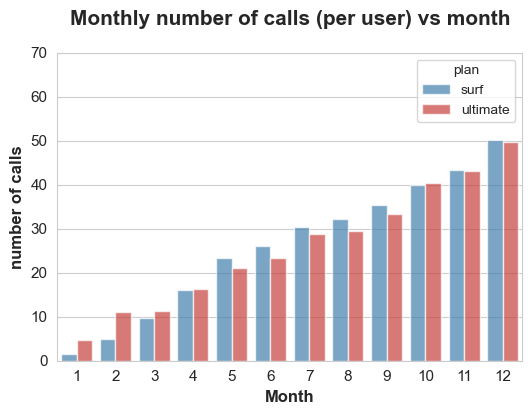

In [129]:
# Plot a bar chart
plan_barplot(data = plan_stat, x = 'month', y = 'call_per_user',
              title = 'Monthly number of calls (per user) vs month',
              xlabel = 'Month', ylabel = 'number of calls', ylim = (0,70))

From the bar chart,
- For the two plans, the monthly number of calls per user increased across the year of 2018.
- On average, every user from both the plans had almost equal monthly number of calls.

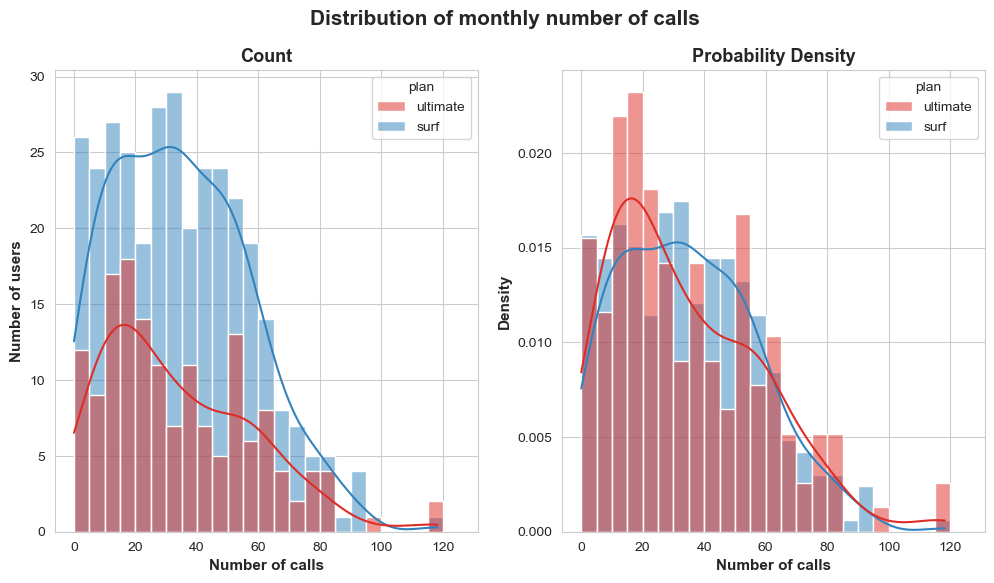

In [130]:
# Plot two histograms, count and probability density
user_hisplot(data = user_stat, x = 'monthly_call', 
             title = 'Distribution of monthly number of calls',
             xlabel = 'Number of calls', ylabel = 'Number of users',
             hue = 'plan', bins = [x for x in range(0, 130, 5)])

From the two histograms,
- The distributions of the monthly number of calls for both the plans are similar and heavily skewed to the right.
- Most users had less than 70 monthly calls in 2018.

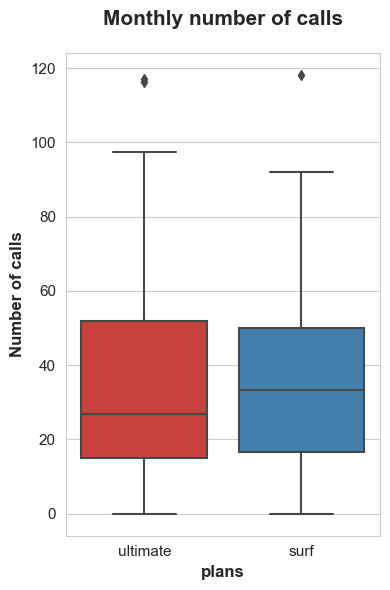

In [131]:
# Plot a boxplot
user_boxplot(data = user_stat, x = 'plan', y = 'monthly_call',
             title = 'Monthly number of calls', 
             xlabel = 'plans', ylabel = 'Number of calls')

From the two boxplot,
- It shows that the distributions of monthly numbers of calls have similar pattern.
- 75% of the users had a monthly call counts between 15 to 50 approximately in 2018.
- The median monthly call counts for surf users is slightly higher than that of the ultimate users. This implies that the surf users may have more calls than the surf users.

In [132]:
# Find the mean and variance
user_mean_variance(surf_user_stat, ulti_user_stat, 'monthly_call')

The mean of the monthly_call for surf users is: 34.78
The mean of the monthly_call for ulti users is: 33.93
--------------------------------------------------------------------------------
The variance of the monthly_call for surf users is: 494.45
The variance of the monthly_call for ulti users is: 591.52
Ratio of variances: 0.836


The descriptive statistics further confirm the above conclusions from the graphs.
- The mean monthly call counts of surf users is higher than that of ultimate users in a neglibilbe amount of 0.85 calls.
- With almost equal means and variance, it implies that the distributions of monthly calls for the two plans are similar.

[Back to Contents](#back)

**Call Duration** <a id='call_duration'></a>

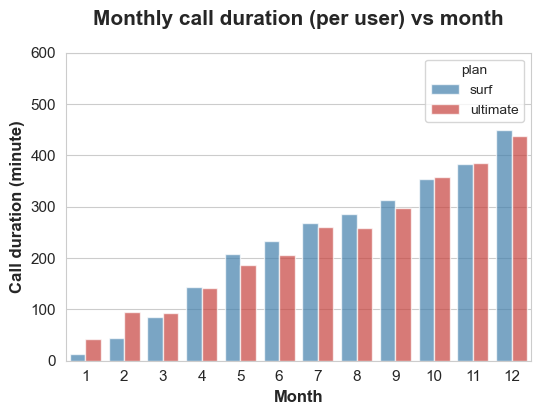

In [133]:
# Plot a bar chart
plan_barplot(data = plan_stat, x = 'month', y = 'duration_per_user',
              title = 'Monthly call duration (per user) vs month',
              xlabel = 'Month', ylabel = 'Call duration (minute)', ylim = (0,600))

From the bar chart,
- For both plans, the monthly call duration per user increased across the year of 2018.
- On average, every user from both the plans had almost equal monthly call duration.

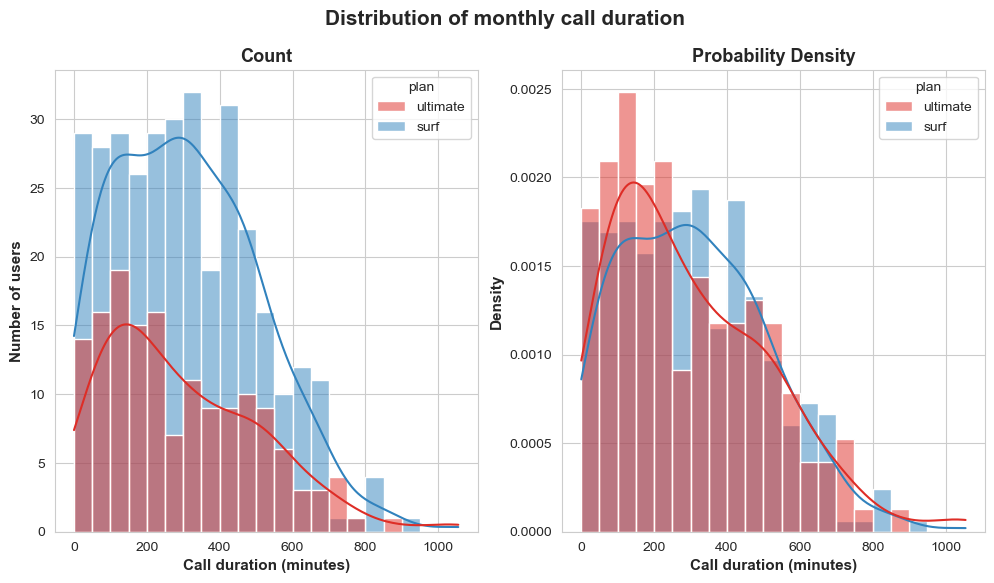

In [134]:
# Plot two histograms, count and probability density
user_hisplot(data = user_stat, x = 'monthly_duration', 
             title = 'Distribution of monthly call duration',
             xlabel = 'Call duration (minutes)', ylabel = 'Number of users',
             hue = 'plan', bins = [x for x in range(0, 1000, 50)])

From the two histograms,
- The distribution patterns of monthly call durations are similar for the users of both plans and heavily skewed to the right.
- Most users had less than 700 minutes of monthly call duration in 2018.
- The distributions of monthly call duration are almost identical to that of the monthly number of calls.

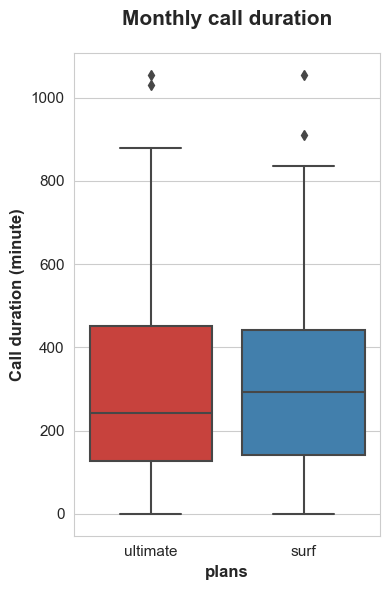

In [135]:
# Plot a boxplot
user_boxplot(data = user_stat, x = 'plan', y = 'monthly_duration',
             title = 'Monthly call duration', 
             xlabel = 'plans', ylabel = 'Call duration (minute)')

From the two boxplot,
- The overall distributions of monthly call duration from the users of both plans are similar.
- 75% of users had a monthly call duration between 150 minutes and 450 minutes in 2018
- The ultimate users have a median monthly call duration around 250 minutes, while surf users have a higher median value around 300 minutes. This shows that surf users tends to have a slightly longer call duration.

In [136]:
# Find the mean and variance
user_mean_variance(surf_user_stat, ulti_user_stat, 'monthly_duration')

The mean of the monthly_duration for surf users is: 309.69
The mean of the monthly_duration for ulti users is: 299.28
--------------------------------------------------------------------------------
The variance of the monthly_duration for surf users is: 39982.95
The variance of the monthly_duration for ulti users is: 47005.31
Ratio of variances: 0.851


The descriptive statistics further confirm the above conclusions from the graphs.
- The means show that surf users had a slightly longer monthly call duration.
- The means are close and the ratio of variance is 0.851 (close to 1), thus the distributions of the monthly call duration for both plans are similar.

[Back to Contents](#back)

**Number of Messages** <a id='number_of_messages'></a>

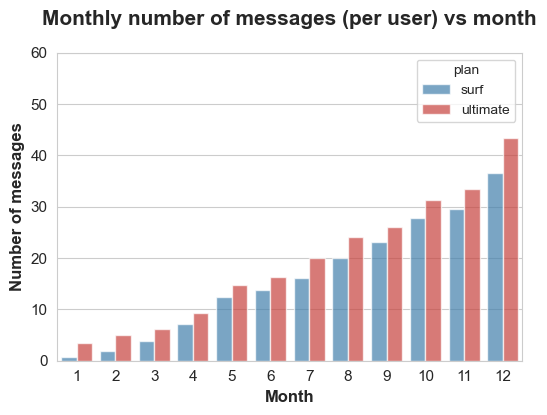

In [137]:
# Plot a bar chart
plan_barplot(data = plan_stat, x = 'month', y = 'message_per_user',
              title = 'Monthly number of messages (per user) vs month',
              xlabel = 'Month', ylabel = 'Number of messages', ylim = (0,60))

From the bar chart,
- For both the plans, the monthly number of messages per user increased across the year of 2018.
- On average, the ultimate users sent more messages than surf users in 2018.

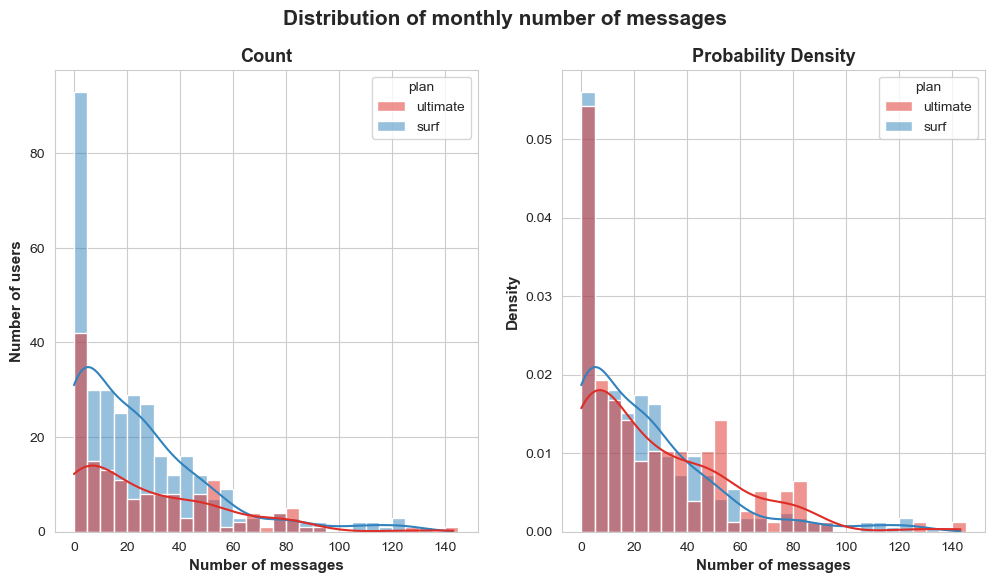

In [138]:
# Plot two histograms, count and probability density
user_hisplot(data = user_stat, x = 'monthly_message', 
             title = 'Distribution of monthly number of messages',
             xlabel = 'Number of messages', ylabel = 'Number of users',
             hue = 'plan', bins = [x for x in range(0, 150, 5)])

From the two histograms,
- The distributions of the monthly number of messages sent by the users of the two plans are almost the same.
- Most of the users sent less than 60 messages each month in 2018.
- Both of the plans have an unusual peak counts at 0 to 5 messages, this implies that part of the users did not (or almost not) use the message service.

In [139]:
user_stat

,user_id,plan,region,monthly_revenue,monthly_call,monthly_duration,monthly_internet_volume,monthly_message
0,1000,ultimate,others,70.000000,16.000000,124.000000,2.000000,11.000000
1,1001,surf,others,50.018000,40.400000,345.600000,16.200000,41.400000
2,1002,surf,others,33.333333,31.333333,276.333333,13.666667,29.333333
3,1003,surf,others,31.510000,9.833333,92.000000,2.250000,4.166667
4,1004,surf,others,76.250000,38.250000,346.500000,19.625000,22.125000
...,...,...,...,...,...,...,...,...
482,1495,surf,NY-NJ,118.325000,52.000000,441.250000,24.750000,0.000000
483,1496,surf,others,23.636364,14.363636,132.272727,6.000000,5.909091
484,1497,ultimate,others,70.000000,42.000000,300.000000,11.000000,50.000000
485,1498,surf,NY-NJ,77.272727,33.727273,291.909091,20.727273,0.000000


In [140]:
# Check how much is the percentage of the users not using the message servcice
print('The percentage of users not using the message service in 2018: ' +
     f'{user_stat.query("monthly_message == 0").shape[0] / user_stat.shape[0]:.2%}')

The percentage of users not using the message service in 2018: 18.07%


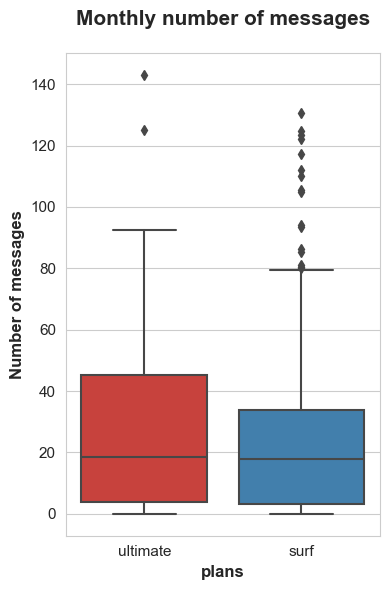

In [141]:
# Plot a boxplot
user_boxplot(data = user_stat, x = 'plan', y = 'monthly_message',
             title = 'Monthly number of messages', 
             xlabel = 'plans', ylabel = 'Number of messages')

From the two boxplots,
- The medians monthly message counts for both the plans are close and equal to 19 approximately.
- The lower quartiles of the two plans are also almost the same but the upper quartile and the upper whisker of ulmatime users are higher. We can deduce that it is highly likely the ultimate users sent more messages each month in 2018.

In [142]:
# Find the mean and variance
user_mean_variance(surf_user_stat, ulti_user_stat, 'monthly_message')

The mean of the monthly_message for surf users is: 23.75
The mean of the monthly_message for ulti users is: 27.28
--------------------------------------------------------------------------------
The variance of the monthly_message for surf users is: 666.19
The variance of the monthly_message for ulti users is: 762.13
Ratio of variances: 0.874


From the descriptive statistics,
- The mean monthly message counts of ultimate users is higher than that of the surf users. This provide another evidence that the ultimate users sent more messages in 2018.

[Back to Contents](#back)

**Volume of Internet Traffic** <a id='volume_of_internet_traffic'></a>

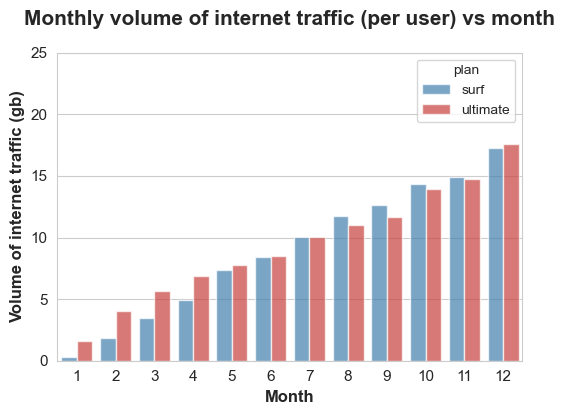

In [143]:
# Plot a bar chart
plan_barplot(data = plan_stat, x = 'month', y = 'internet_volume_per_user',
              title = 'Monthly volume of internet traffic (per user) vs month',
              xlabel = 'Month', ylabel = 'Volume of internet traffic (gb)', ylim = (0,25))

From the bar chart,
- For both the plans, the monthly volume of internet traffic per user increased across the year of 2018.
- The monthly internet traffic volume for the users from both plans are almost the same.

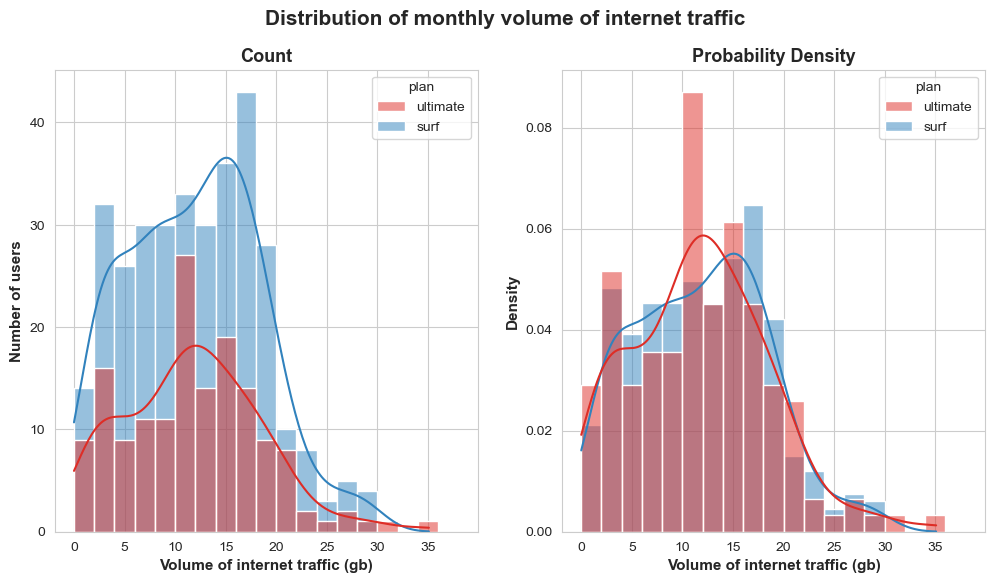

In [144]:
# Plot two histograms, count and probability density
user_hisplot(data = user_stat, x = 'monthly_internet_volume', 
             title = 'Distribution of monthly volume of internet traffic',
             xlabel = 'Volume of internet traffic (gb)', ylabel = 'Number of users',
             hue = 'plan', bins = [x for x in range(0, 40, 2)])

From the two histograms,
- Same as the distributions for monthly call counts and call duration, the distributions of volume traffic for both plans are also show similar patterns and skew to the right. However, the skewness is slightly lower than that of call counts and call duration.
- In each month of 2018, most of the users used less than 20 gb of internet traffic volume.
- The surf users have a peak count at 14 to 16 gb of internet traffic volume while the ultimate users peak at around 12 gb.

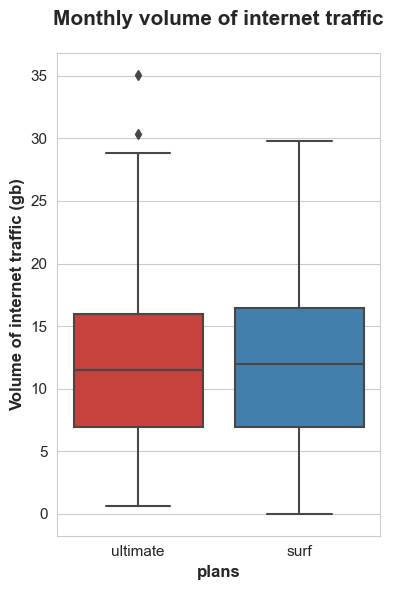

In [145]:
# Plot a boxplot
user_boxplot(data = user_stat, x = 'plan', y = 'monthly_internet_volume',
             title = 'Monthly volume of internet traffic', 
             xlabel = 'plans', ylabel = 'Volume of internet traffic (gb)')

From the two boxplots,
- The two boxplots are almost the same, this result implies a highly identical distribution patterns as shown in the histograms.
- The medians monthly volume of internet traffic for both plans are about 12 gb.
- In 2018, 75% of users had used about 7 to 16 gb of internet traffic volume each month.

In [146]:
# Find the mean and variance
user_mean_variance(surf_user_stat, ulti_user_stat, 'monthly_internet_volume')

The mean of the monthly_internet_volume for surf users is: 11.89
The mean of the monthly_internet_volume for ulti users is: 11.77
--------------------------------------------------------------------------------
The variance of the monthly_internet_volume for surf users is: 42.52
The variance of the monthly_internet_volume for ulti users is: 44.30
Ratio of variances: 0.960


From the above descriptive statistics,
- It further confirms that the users from both the plans show no difference in the usage of internet traffic volume.

Before testing hypothesis, we will analyse the `monthly_revenue` of two plans to gain some insights.

[Back to Contents](#back)

**Revenue** <a id='revenue'></a>

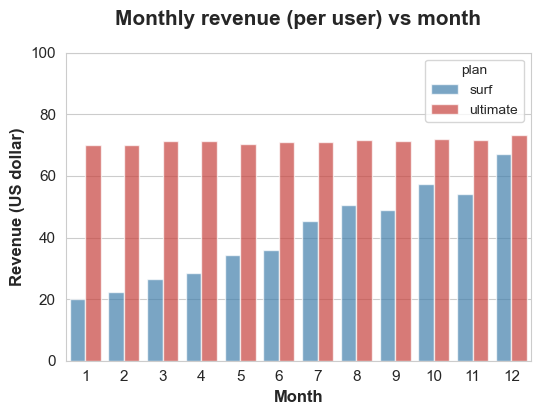

In [147]:
# Plot a bar chart
plan_barplot(data = plan_stat, x = 'month', y = 'revenue_per_user',
              title = 'Monthly revenue (per user) vs month',
              xlabel = 'Month', ylabel = 'Revenue (US dollar)', ylim = (0,100))

From the bar chart,
- It clearly shows that the ultimate plan users generated more revenue than the surf users in 2018.
- The revenue from surf users gradually increased over the year of 2018. This increment is due to the increase in the call duration, the number of message sent and the volume of internet traffic.
- Since the ultimate plan provides higher limits of call duration, number of messages, volume of internet traffic, the increasing usage of these three service did not generate more revenue for the company.

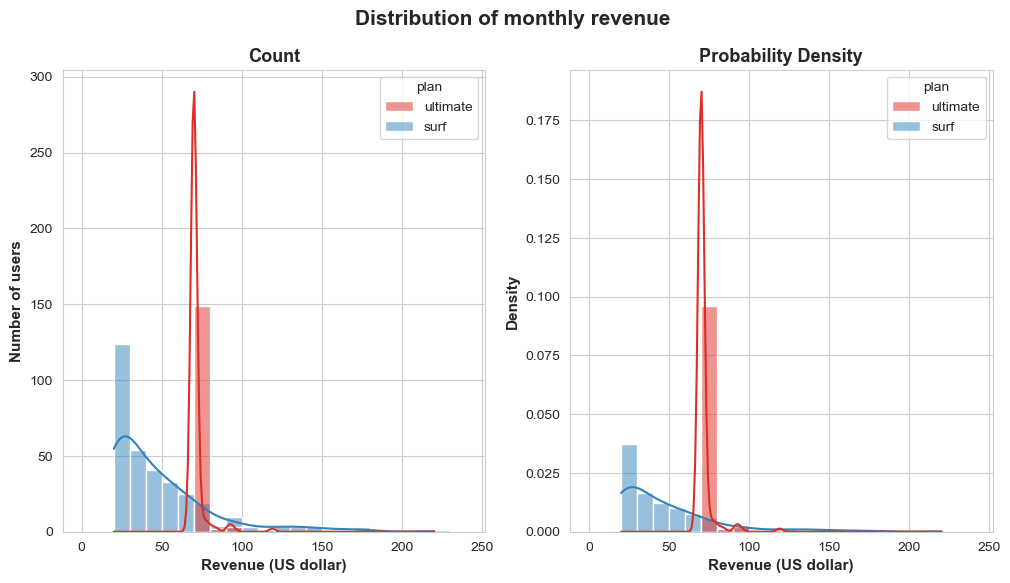

In [148]:
# Plot two histograms, count and probability density
user_hisplot(data = user_stat, x = 'monthly_revenue', 
             title = 'Distribution of monthly revenue',
             xlabel = 'Revenue (US dollar)', ylabel = 'Number of users',
             hue = 'plan', bins = [x for x in range(0, 250, 10)])

From the two histograms,
- The distribution of the monthly revenue for the surf user skews to the right. The count of users has a peak at 20 US dollars which is the subcription fee.
- The distribution of the monthly revenue for the ultimate user has a very sharp peak at the 70 US dollars subcription fee. About 90% (10 x 0.09 in the probablility density plot) of the ultimate users only paid for the subcription fee in 2018. 

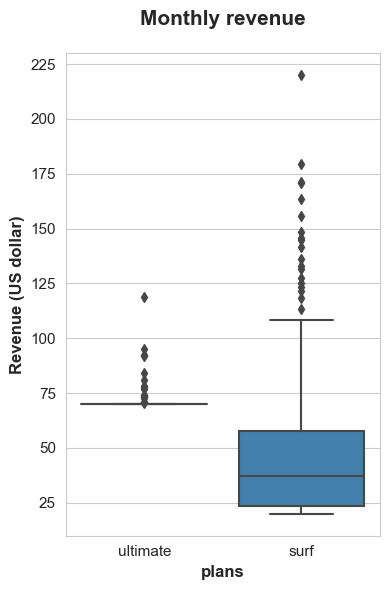

In [149]:
# Plot a boxplot
user_boxplot(data = user_stat, x = 'plan', y = 'monthly_revenue',
             title = 'Monthly revenue', 
             xlabel = 'plans', ylabel = 'Revenue (US dollar)')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Strong difference here. It's not difficult to suppose hypothesis testing results.
</div>

From the two boxplots,
- On average, 75% of the surf users paid 20 to 60 US dollars each month to the company in 2018.
- As indicated by the histograms above, almost every ultimate user paid for the monthly subscription fee only in 2018.
- The outliers of surf users paid a lot more than that of ultimate users even though these users used almost equal amount of services provided as shown above. This is due to the higher overage charges of the surf plan compared to the ultimate plan.

In [150]:
# Find the mean and variance
user_mean_variance(surf_user_stat, ulti_user_stat, 'monthly_revenue')

The mean of the monthly_revenue for surf users is: 47.22
The mean of the monthly_revenue for ulti users is: 71.20
--------------------------------------------------------------------------------
The variance of the monthly_revenue for surf users is: 1036.08
The variance of the monthly_revenue for ulti users is: 27.98
Ratio of variances: 37.025


From the descriptive statistics,
- The mean monthly revenue of ulti users was a lot higher than that of the surf users. Whether this difference is significant, we will conduct a statistical testing on the monthly revenue to give a more reliable conclusion.

**Conclusion** <a id='user_behaviour_conclusion'></a>
1. The users from both the plans show similar patterns in the amount of using the `call`, `message`, `internet` services.
2. Generally, the amount of `call`, `message` and `internet` usage increased across the year of 2018.
3. The `message` service is less popular than the other two services, 18.07% of users did not used the message service in 2018.
4. Due to the increasing usage of `call`, `message` and `internet`, the monthly revenue from the surf user also increased gradually in 2018. However, the monthly revenue from the ultimate users almost remained the same amount due to the higher overage limits provided.

[Back to Contents](#back)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Beautiful plots and I totally agree with your conclusions in every section!
</div>

## 6.0 Hypothesis Testing <a id='hypothesis_testing'></a>

### Hypothesis 1: The average revenue from users of the Ultimate and Surf calling plans differs. <a id='hypothesis_1'></a>

In [151]:
# Check how many users are there in each plan
print(f'Total number of surf users in 2018: {surf_user_stat.shape[0]}')
print(f'Total number of ultimate users in 2018: {ulti_user_stat.shape[0]}')

Total number of surf users in 2018: 332
Total number of ultimate users in 2018: 155


In [152]:
# Find the mean and variance
surf_rev_mean = np.mean(surf_user_stat['monthly_revenue'])
ulti_rev_mean = np.mean(ulti_user_stat['monthly_revenue'])
surf_rev_var = np.var(surf_user_stat['monthly_revenue'])
ulti_rev_var = np.var(ulti_user_stat['monthly_revenue'])
surf_rev_std = np.std(surf_user_stat['monthly_revenue'])
ulti_rev_std = np.std(ulti_user_stat['monthly_revenue'])

print(f'The mean of the monthly revenue from surf users is: {surf_rev_mean:.2f}')                     
print(f'The mean of the monthly revenue from ulti users is: {ulti_rev_mean:.2f}')
print('-'*80)
print(f'The variance of the monthly revenue from surf users is: {surf_rev_var:.4f}')
print(f'The variance of the monthly revenue from ulti users is: {ulti_rev_var:.4f}')
print('-'*80)
print(f'The standard deviation of the monthly revenue from surf users is: {surf_rev_std:.4f}')
print(f'The standard deviation of the monthly revenue from ulti users is: {ulti_rev_std:.4f}')
print('-'*80)
print(f'Ratio of variances: {(surf_rev_var / ulti_rev_var):.4f}')

The mean of the monthly revenue from surf users is: 47.22
The mean of the monthly revenue from ulti users is: 71.20
--------------------------------------------------------------------------------
The variance of the monthly revenue from surf users is: 1036.0816
The variance of the monthly revenue from ulti users is: 27.9834
--------------------------------------------------------------------------------
The standard deviation of the monthly revenue from surf users is: 32.1882
The standard deviation of the monthly revenue from ulti users is: 5.2899
--------------------------------------------------------------------------------
Ratio of variances: 37.0248


Let the population mean of monthly revenue from surf users be \$\mu_{1}$

Let the population mean of monthly revenue from ultimate users be \$\mu_{2}$

**Sample 1: Surf Users**
- Number of observations: \$n_{1} \= 332$

- Monthly revenue mean: \$\bar{x}_{1} \= 47.22$

- Monthly revenue variance: \$s_{1} \= 32.1882$

**Sample 2: Ultimate Users**
- Number of observations: \$n_{2} \= 155$

- Monthly revenue mean: \$\bar{x}_{2} \= 71.20$

- Monthly revenue variance: \$s_{2} \= 5.2899$

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

The two samples are independent and we are testing if their means differ, a **two-sample independent t-test** will be performed. 

To perform a two-sample independent t-test, it is assumed that both samples follow a normal distribution.Hence, a histogram will be plotted for each sample to check the normality.

The ratio of the the sample variances is 37.0248, we can assume that their variances are different. A **Levene's test** will be conducted to confirm this.

Since the sample mean of ultimate users is a lot greater than that of surf users, we will take a stricter significant level of 0.01 to decrease the probalility of type 1 error which wrongly conclude that the means are different.

Significance level: \$\alpha \= 0.01$

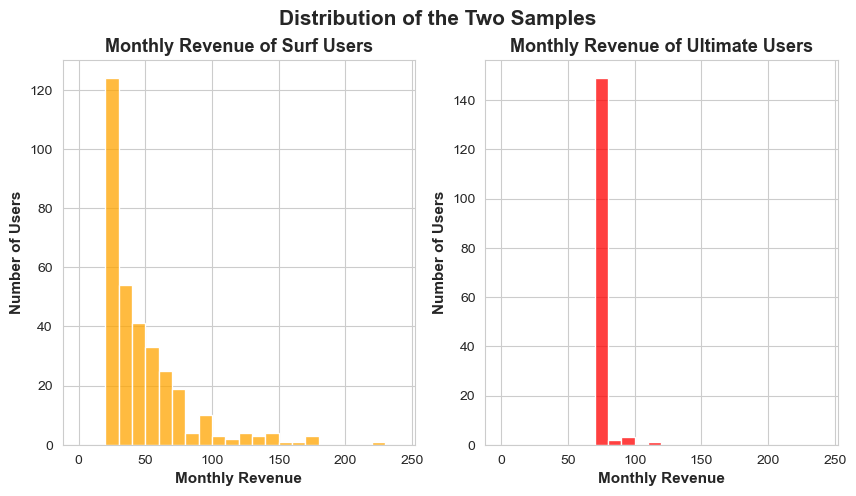

In [153]:
# Plot histograms to check the normality of the sample distributions
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))    

sns.histplot(data = surf_user_stat['monthly_revenue'], bins = [x for x in range(0, 250, 10)], 
             color = 'orange', ax = ax1)
sns.histplot(data = ulti_user_stat['monthly_revenue'], bins = [x for x in range(0, 250, 10)],
             color = 'red', ax = ax2)
    
fig.suptitle('Distribution of the Two Samples', fontsize=15, fontweight='bold')
    
ax1.set_title('Monthly Revenue of Surf Users', fontsize = 13, fontweight = 'bold')
ax1.set_xlabel('Monthly Revenue', fontsize = 11, fontweight = 'bold')
ax1.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')  
    
ax2.set_title('Monthly Revenue of Ultimate Users', fontsize = 13, fontweight = 'bold')    
ax2.set_xlabel('Monthly Revenue', fontsize = 11, fontweight = 'bold')
ax2.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')    
    
plt.show()

The distributions of the two samples are not normal. However, with large samples size of 332 and 155, the sample mean distribution is close to be normal according to the central limit theorem and t-test can be applied.

In [154]:
# Test if the two variances are different
# Take a significance level of 0.05
st.levene(surf_user_stat['monthly_revenue'],
          ulti_user_stat['monthly_revenue'],
          center = 'median')

LeveneResult(statistic=98.61213636656255, pvalue=2.8047021967328477e-21)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Such a nice touch to include a homoskedasticity test here.
</div>

The null hypothesis for Lenene's test is that the variances are equal for the two samples. 

**By taking a significance level of 0.01, a p-value of 3.15e-21 is much more lower than the signficance level, we reject the null hypothesis and assume that the variances are not equal.**

In [155]:
# Conduct t test to test if the means differ
alpha = 0.01

plan_result = st.ttest_ind(surf_user_stat['monthly_revenue'],
                           ulti_user_stat['monthly_revenue'],
                           equal_var = False)

print('p_value:', plan_result.pvalue)

if plan_result.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to to reject the null hypothesis.')

p_value: 9.203743018088661e-33
We reject the null hypothesis.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great job!
</div>

**Since the p-value of 1.73e-33 is lower than the significance level of 0.01, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the monthly revenue means from the surf users and ultimate populations are significantly different.**

[Back to Contents](#back)

### Hypothesis 2:  The average revenue from users in the NY-NJ area is different from that of the users in the other regions. <a id='hypothesis_2'></a>

In [156]:
# Create two dataframes containing information of
# NY-NJ and non-NY-NJ users
nynj_user_stat = user_stat.query('region == "NY-NJ"')
other_regions_user_stat = user_stat.query('region == "others"')

In [157]:
# Check how many users are there in each region
print(f'Total number of NY-NJ users in 2018: {nynj_user_stat.shape[0]}')
print(f'Total number of users from other regions in 2018: {other_regions_user_stat.shape[0]}')

Total number of NY-NJ users in 2018: 79
Total number of users from other regions in 2018: 408


In [158]:
# Find the mean and variance
nynj_rev_mean = np.mean(nynj_user_stat['monthly_revenue'])
other_regions_rev_mean = np.mean(other_regions_user_stat['monthly_revenue'])
nynj_rev_var = np.var(nynj_user_stat['monthly_revenue'])
other_regions_rev_var = np.var(other_regions_user_stat['monthly_revenue'])
nynj_rev_std = np.std(nynj_user_stat['monthly_revenue'])
other_regions_rev_std = np.std(other_regions_user_stat['monthly_revenue'])

print(f'The mean of the monthly revenue from NY-NJ users is: {nynj_rev_mean:.2f}')                     
print(f'The mean of the monthly revenue from the users in the other regions is: {other_regions_rev_mean:.2f}')
print('-'*100)
print(f'The variance of the monthly revenue from NY-NJ users is: {nynj_rev_var:.4f}')
print(f'The variance of the monthly revenue from the users in the other regions is: {other_regions_rev_var:.4f}')
print('-'*100)
print(f'The standard deviation of the monthly revenue from NY-NJ users is: {nynj_rev_std:.4f}')                     
print(f'The standard deviation of the monthly revenue from the users in the other regions is: {other_regions_rev_std:.4f}')
print('-'*100)
print(f'Ratio of variances: {(nynj_rev_var / other_regions_rev_var):.4f}')

The mean of the monthly revenue from NY-NJ users is: 52.81
The mean of the monthly revenue from the users in the other regions is: 55.25
----------------------------------------------------------------------------------------------------
The variance of the monthly revenue from NY-NJ users is: 749.6958
The variance of the monthly revenue from the users in the other regions is: 856.6106
----------------------------------------------------------------------------------------------------
The standard deviation of the monthly revenue from NY-NJ users is: 27.3806
The standard deviation of the monthly revenue from the users in the other regions is: 29.2679
----------------------------------------------------------------------------------------------------
Ratio of variances: 0.8752


Let the population mean of monthly revenue from NY-NJ users be \$\mu_{1}$

Let the population mean of monthly revenue from users in the other regions be \$\mu_{2}$

**Sample 1: NY-NJ Users**
- Number of observations: \$n_{1} \= 79$

- Monthly revenue mean: \$\bar{x}_{1} \= 52.81$

- Monthly revenue standard deviation: \$s_{1} \= 27.3806$

**Sample 2: Users in the Other Regions**
- Number of observations: \$n_{2} \= 408$

- Monthly revenue mean: \$\bar{x}_{2} \= 55.25$

- Monthly revenue standard deviation: \$s_{2} \= 29.2679$

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

The two samples are independent and we are testing if their means differ, a **two-sample independent t-test** will be performed.

To perform a two-sample independent t-test, it is assumed that both samples follow a normal distribution. Hence, a histogram will be plotted for each sample to check the normality.

The ratio of the the sample variances is 0.8752, it is likely that we can assume their variances are equal. A **Levene's test** will be conducted before we make a conclusion.

To test this hypothesis, it is decided to take a significance level of 0.05

Significance level: \$\alpha \= 0.05$

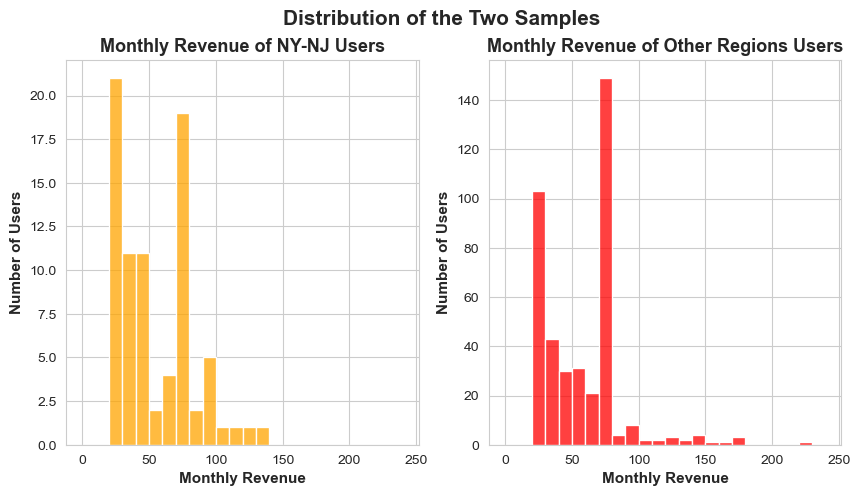

In [159]:
# Plot histograms to check the normality of the sample distributions
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))    

sns.histplot(data = nynj_user_stat['monthly_revenue'], bins = [x for x in range(0, 250, 10)], 
             color = 'orange', ax = ax1)
sns.histplot(data = other_regions_user_stat['monthly_revenue'], bins = [x for x in range(0, 250, 10)],
             color = 'red', ax = ax2)
    
fig.suptitle('Distribution of the Two Samples', fontsize=15, fontweight='bold')
    
ax1.set_title('Monthly Revenue of NY-NJ Users', fontsize = 13, fontweight = 'bold')
ax1.set_xlabel('Monthly Revenue', fontsize = 11, fontweight = 'bold')
ax1.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')  
    
ax2.set_title('Monthly Revenue of Other Regions Users', fontsize = 13, fontweight = 'bold')    
ax2.set_xlabel('Monthly Revenue', fontsize = 11, fontweight = 'bold')
ax2.set_ylabel('Number of Users', fontsize = 11, fontweight = 'bold')    
    
plt.show()

The distributions of the two samples are also not normal. However, by utilising central limit theorem, the sample mean distribution tends to be normal with a large sample size of greater than 30. Since the two sample sizes are 79 and 408, t-test can be applied.

In [160]:
# Test if the two variances are different
# Take a significance level of 0.05
st.levene(nynj_user_stat['monthly_revenue'],
          other_regions_user_stat['monthly_revenue'],
          center = 'median')

LeveneResult(statistic=0.018848824678097, pvalue=0.8908577416685743)

The null hypothesis for Lenene's test is that the variances are equal for the two samples. 

**By taking a significance level of 0.05, a p-value of 0.9088 is much higher than the signficance level, we failed to reject the null hypothesis and we assume that the variances are equal.**

In [161]:
# Conduct t test to test if the means differ
alpha = 0.01

region_result = st.ttest_ind(nynj_user_stat['monthly_revenue'],
                             other_regions_user_stat['monthly_revenue'])

print('p_value:', region_result.pvalue)

if region_result.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to to reject the null hypothesis.')

p_value: 0.4947331248621929
We fail to to reject the null hypothesis.


**Since the p-value of 0.4856 is higher than the significance level of 0.05, we fail to reject the null hypothesis \$H_{0}$. We do not have enough evidence to conclude that the monthly revenue means from the NY-NJ users and users in the other regions are significantly different.**

[Back to Contents](#back)

## 7. General Conclusion <a id='general_conclusion'></a>
**Data Exploration**

The Megaline company has provided five datasets which have information about the `plan`, `user`, `call`, `message` and `internet`. The data provided are sufficient to conduct the relevant analysis and test the hypotheses. However, there are some issues needed to be addresed such as wrong data types and the wrong measurement units.

**Data Cleaning and DataEnrichment**
- The data types of `reg_date`, `churn_date`, `call_date`, `message_date`, `session_date` were changed to `datetime`.
- The `mb_per_month_included` were renamed to `gb_per_month_included`.
- The values of `duration` were rounded to the integral value and summed up for each month, data type was changed to `int64`.
- The values of `mb_used` were summed up for each month, divided by 1024 and rounded to the integral value, data type was changed to `int64`. 
- The `0` values in `duration` and `mb_used` were identified as 'anomalies' and dropped.
- The users with `0` months using the three services were excluded from the analysis.
- Add two columns containing year and month values for all the `datetime` columns.
- Add a `region` column in `user_data` to specify if a user is in the NY-NY area.

**Data Aggregation**
1. `user_monthly_call`, `user_monthly_message` and `user_monthly_internet` were aggreated from the `call_data`, `message_data`, `internet_data` provided by the Megaline company.
2. `user_monthly_data` was created by merging the information from `user_data`, `user_monthly_call`, `user_monthly_message` and `user_monthly_internet` data.
3. `plan_stat` was aggregated from `user_monthly_data` consists of the individual month data per user. `user_stat` was aggregated from `user_monthly_data` consists of the individual user data per month.

**Study User Behaviours**

User behaviours in terms of `number of calls`, `call duration`, `number of messages` and `volume of internet traffic` were study and analysed with the `revenue`. The following conclusion was made:
1. The users from both the plans show similar patterns in the amount of using the `call`, `message`, `internet` services.
2. Generally, the amount of `call`, `message` and `internet` usage increased across the year of 2018.
3. The `message` service is less popular than the other two services, 18.07% of users did not used the message service in 2018.
4. Due to the increasing usage of `call`, `message` and `internet`, the monthly revenue from the surf user also increased gradually in 2018. However, the monthly revenue from the ultimate users almost remained the same amount due to the higher overage limits provided.

**Hypothesis testing**

This report aims to answer the following questions:
1. Between the two plans, surf and ultimate, which of them generates more revenue for the Megaline company?
2. Do the users from different areas/regions generate different amount of revenue?

Two relevant hypotheses have been tested:
1. The average revenue from users of the Ultimate and Surf calling plans differs.

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

Significance level: \$\alpha \= 0.01$

After conducting the statistical test - two-sample independent t-test, we have the following result:

**Since the p-value of 1.73e-33 is lower than the significance level of 0.01, we reject the null hypothesis \$H_{0}$. We have enough evidence to conclude that the monthly revenue means from the surf users and ultimate populations are significantly different.**

2. The average revenue from users in the NY-NJ area is different from that of the users in the other regions.

\$H_{0}: \mu_{1} \= \mu_{2}\$

\$H_{1}: \mu_{1} \ne \mu_{2}\$

Significance level: \$\alpha \= 0.05$

After conducting the statistical test - two-sample independent t-test, we have the following result:

**Since the p-value of 0.4856 is higher than the significance level of 0.05, we fail to reject the null hypothesis \$H_{0}$. We do not have enough evidence to conclude that the monthly revenue means from the NY-NJ users and users in the other regions are significantly different.**

[Back to Contents](#back)

<div class="alert alert-block alert-danger">
    
# General comments
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Meticulous and systematic. Those are the words I have for you today. You have done an amazing job with this project, and I have enjoyed reading it. However, we still need to address some small issues before approving your project. I have left some comments for you to review and make the necessary changes.
</div>

<div class="alert alert-block alert-success">
    
# General comments
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything has been properly corrected and you've approved a new project. Congratulations!
</div>